<h1 style="text-align: center"> Machine Learning CMPS 460 L52 Project Phase 1 </h1>
<h3 style="text-align: center"> Group 1 Spring 2023 </h1>

<p>Group members: </p>
<ul>
  <li>Salma Eletreby 202005204</li>
  <li>Fatma Elnahas 202008126</li>
  <li>Roudha Al Rumaihi  201902528</li>
</ul>

<p>Dataset used: <a href="https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques">Kaggle House Prices competition</a>
 </p>

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem">
    <p style="padding: 2rem">Motivation: House prices are on the rise and its hard to know if you are getting a true accurate price and if its good quality for a house that goes on sale. This project aims to create models using available dataset to predict the prices of houses or the quality </p>
</div>

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>Objectives:</p>
    <ul>
        <li>Understanding Data</li>
        <li>Cleaning data</li>
        <li>trying different models using quality and sale price as label</li>
    </ul>
</div>

<div style="background-color: #C0DBEA; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <h3 style="text-align: center">Part 1: Cleaning and Analysing Data</h3>
</div>

<div style="background-color: #9384D1; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>Global Variables Used: </p>
    <ul>
        <li>training_data = the entire dataset of training data given</li>
        <li>training_data_copy = the entire dataset of training data copied to leave the original one untouched</li>
        <li>training_data_Numerical = the numerical features in our training data</li>
        <li>training_data_cat = the categorical features in our training data</li>
    </ul>
</div>

In [475]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn import datasets
import sklearn
from scipy import stats
from scipy.stats import chi2_contingency
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
matplotlib.style.use('ggplot')
np.random.seed(1)

<div style="background-color: #FDF4F5; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <p style="text-align: center">Creating our dataset from the provided spreasheet</p>
</div>

In [476]:
training_data = pd.read_csv("train.csv")
training_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<div style="background-color: #FDF4F5; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <p style="text-align: center">Displaying general statistics of the data set</p>
    <p style="text-align: center; font-size: 10px">Id was dropped as it was not needed</p>
</div>

In [477]:
training_data.describe(include='all').drop('Id', axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [478]:
training_data.drop('Id', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p> As seen from the describe function and info function, some features have 'NaN' or missing values as their most frequent values after some investigation it seems that most of these features are optional in a house so they might not exist explaining the amount of missing values, for example "PoolArea" has 'NaN' as its ost frequent cause most houses don't have a pool so don't have a pool area to begin with. Depending on how much correlation these feautures have it may be best to either drop them or replace them with flags if possible.</p>
    <br>
    <p>Moving onto Sales Price feature, it is obvious the existence of outliers as the max value (755000.000000) is higher than the (IQ3+(1.5*IQR).This is to be expected as if a house is a mansion it will be more expensive and if it was sold during high market time it could affect the price severly</p>
    <br>
    <p>Looking at the output of the info function it seems that some features which are catgeorical have been detected as numerical. The reason for that is those features have mapped their categories into numbers instead of leaving them as string (as seen from the provided data_description.txt file).If we need to visualise them we should treat them as categorical and one way to detect them is through using the unique value given by the describe function. If a feature has low number of unique values its most likely categorical</p>
</div>

<div style="background-color: #FDF4F5; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <p style="text-align: center">Visualising Features to observe distribution</p>
</div>

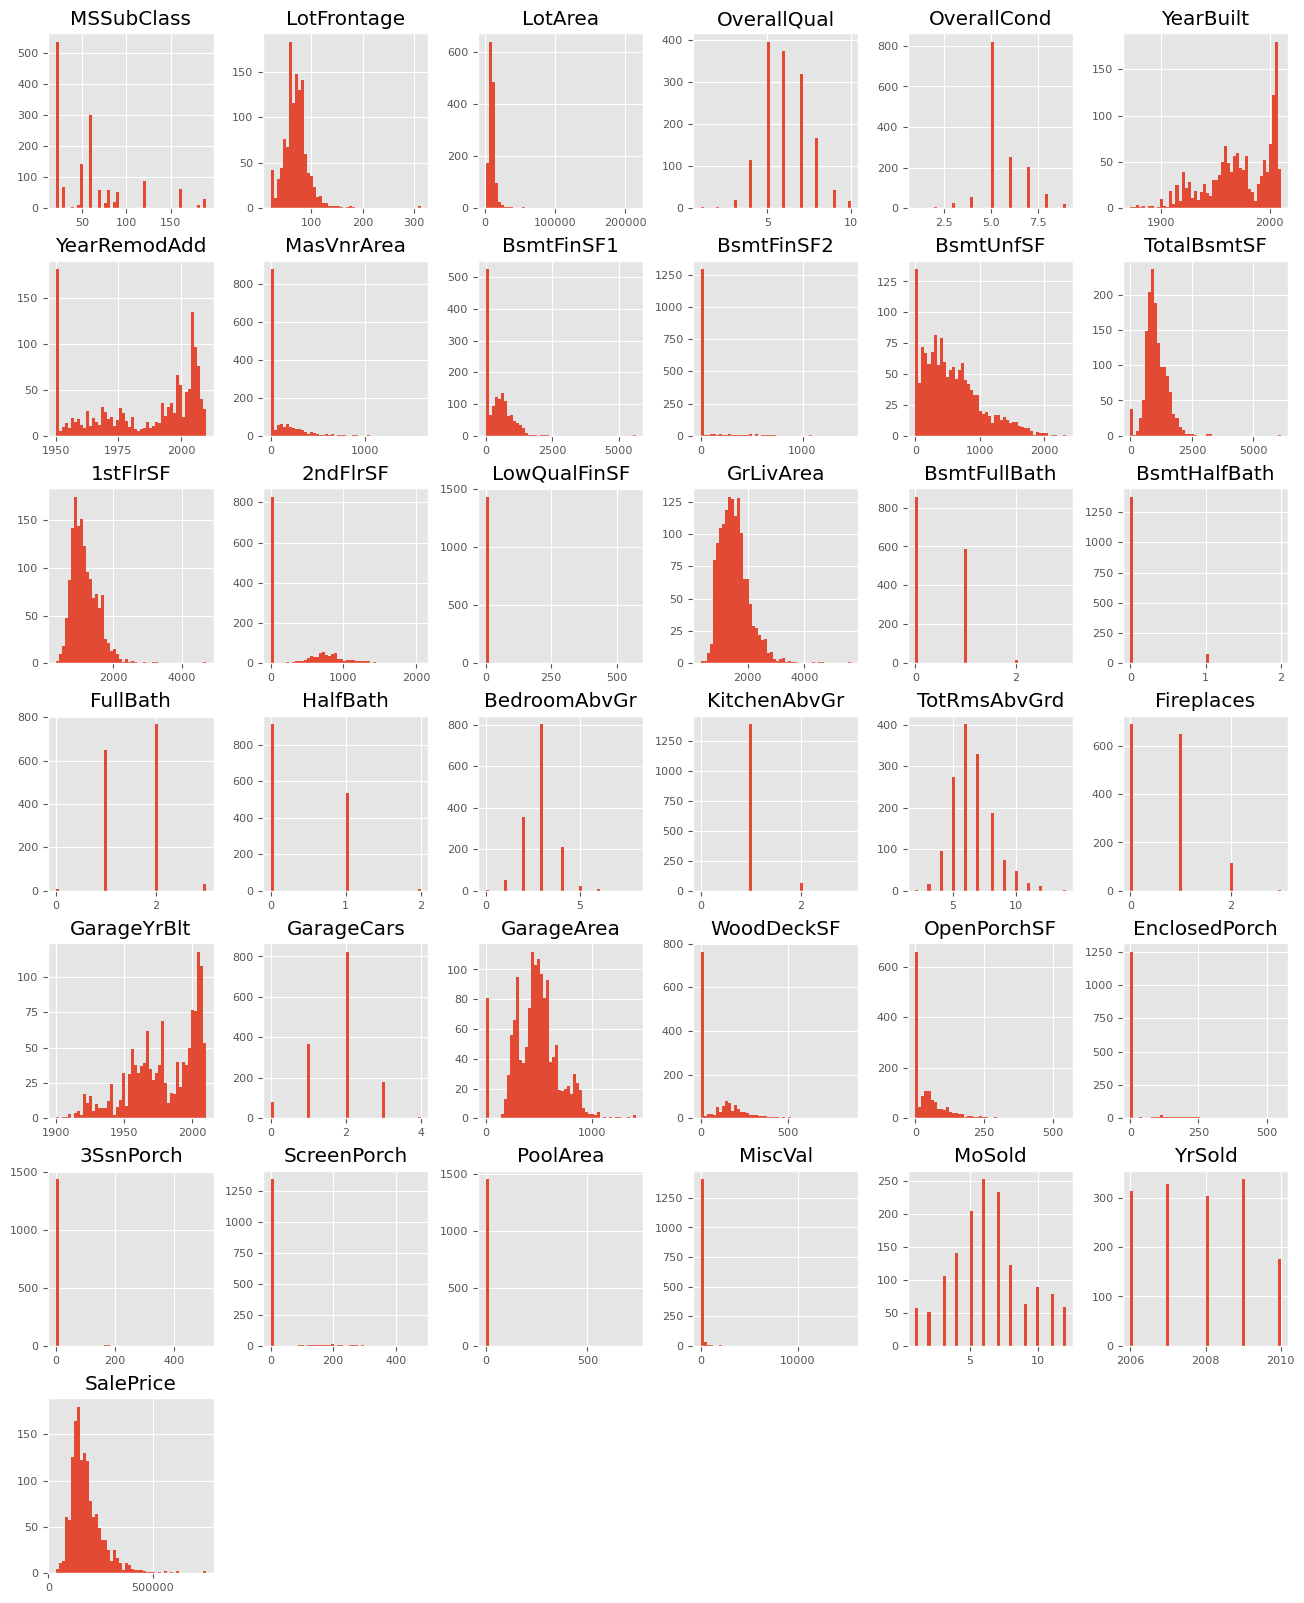

In [479]:
training_data.drop('Id',axis=1).select_dtypes(include =["float64","int64"]).hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>As seen form the plots most data do not follow normal distribution in fact most of them seem to have an obvious skew - right skew. This is because some features are more desired than others in a house so it is easy for realtors and sellers to push for a higher Sale Price if these fetaures exist</p>
</div>

<div style="background-color: #FDF4F5; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <p style="text-align: center">Checking on the features that have too many missing values</p>
</div>

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>If a feature has too many missing values it is better to remove them then replace them but first we will check the correlation to amke sure it does not have a massive effect on sales price</p>
</div>

In [480]:
temp = pd.DataFrame()

for col in training_data.columns:
    null_rows = training_data[col].isnull().sum()
    if null_rows > 500:
        temp[col] = training_data[col]
        print(f"Number of null rows in column {col}: {null_rows}")

Number of null rows in column Alley: 1369
Number of null rows in column FireplaceQu: 690
Number of null rows in column PoolQC: 1453
Number of null rows in column Fence: 1179
Number of null rows in column MiscFeature: 1406


<div style="background-color: #FDF4F5; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <p style="text-align: center">Creating a copy of our dataset for manipulation</p>
</div>

In [481]:
training_data_copy = training_data.copy()

<div style="background-color: #FDF4F5; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <p style="text-align: center">Correlation w/ Sale Price</p>
    <p style="text-align: center; font-size: 10px">Spearman was used as some of the categorical ones were ordinal and later we will see not unifromally distributed</p>
</div>

In [482]:
corr_values = {}
for col in training_data_copy.select_dtypes(include=[float, int]).drop('SalePrice',axis=1).columns:
        corr, _ = stats.spearmanr(training_data_copy['SalePrice'], training_data_copy[col])
        corr_values[col] = corr

for col, corr in corr_values.items():
    print(f'{col}: {corr:.3f}')

Id: -0.019
MSSubClass: 0.007
LotFrontage: nan
LotArea: 0.456
OverallQual: 0.810
OverallCond: -0.129
YearBuilt: 0.653
YearRemodAdd: 0.571
MasVnrArea: nan
BsmtFinSF1: 0.302
BsmtFinSF2: -0.039
BsmtUnfSF: 0.185
TotalBsmtSF: 0.603
1stFlrSF: 0.575
2ndFlrSF: 0.294
LowQualFinSF: -0.068
GrLivArea: 0.731
BsmtFullBath: 0.225
BsmtHalfBath: -0.012
FullBath: 0.636
HalfBath: 0.343
BedroomAbvGr: 0.235
KitchenAbvGr: -0.165
TotRmsAbvGrd: 0.533
Fireplaces: 0.519
GarageYrBlt: nan
GarageCars: 0.691
GarageArea: 0.649
WoodDeckSF: 0.354
OpenPorchSF: 0.478
EnclosedPorch: -0.218
3SsnPorch: 0.065
ScreenPorch: 0.100
PoolArea: 0.058
MiscVal: -0.063
MoSold: 0.069
YrSold: -0.030


<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>As seen by the plots, most values do not follow a normal distribution so spearman's correlation was used. BsmtHalfBath had the lowest correlation with sale price indicating it doesn't affect it that much. Only few of the features have a correlation of higher than 0.5 or lower than -0.5.These features probably have the greatest effect on the sales price so if needed we will choose from those</p>
</div>

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem">
    <p style="padding: 2rem">Most of the features with a lot of missing values have low correlation with the exception of FireplaceQu so we will investigate it more</p>
</div>

In [483]:
# Numeric column
num_col = 'SalePrice'

print("Chi squared of the values with a lot of missing values: ")

# Iterate over the categorical columns
for col in temp.columns:
    # Create a crosstab table of the numeric column and the categorical column
    crosstab = pd.crosstab(training_data_copy[num_col], training_data_copy[col])
    # Perform a chi-squared test to calculate the association between the two columns
    chi2_stat, p_val, dof, expected = chi2_contingency(crosstab)
    # Print the results
    print(f'Correlation between {num_col} and {col}:')
    print(f'Chi-squared statistic: {chi2_stat:.2f}')
    print(f'P-value: {p_val:.2f}')
#     print(f'Degrees of freedom: {dof}')
    print('---------------------')

Chi squared of the values with a lot of missing values: 
Correlation between SalePrice and Alley:
Chi-squared statistic: 91.00
P-value: 0.21
---------------------
Correlation between SalePrice and FireplaceQu:
Chi-squared statistic: 2020.08
P-value: 0.00
---------------------
Correlation between SalePrice and PoolQC:
Chi-squared statistic: 14.00
P-value: 0.30
---------------------
Correlation between SalePrice and Fence:
Chi-squared statistic: 521.58
P-value: 0.91
---------------------
Correlation between SalePrice and MiscFeature:
Chi-squared statistic: 162.00
P-value: 0.24
---------------------


<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>Most of the features with a lot of missing values have high p value with the exception of FireplaceQu so we see that we can just use the feature 'Fireplaces' as it's already numeric and has a similar correlation</p>
    <p>P values are sometimes displayed as 0.00 because the number is too small<p>
</div>

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>Since our dataset has 80 features we have decided to narrow it down to further investigate.</p> 
    <p>After doing the research using <a href="https://www.opendoor.com/articles/factors-that-influence-home-value">Factors That Influence Home Value</a> and <a href="https://www.experian.com/blogs/ask-experian/factors-that-affect-home-value/#:~:text=A%20home's%20value%20is%20affected,age%2C%20location%20and%20property%20size.">Factors That Affect Home Value</a> it is decided to keep</p>
    <ol>
        <li>MSSubClass: Identifies the type of dwelling involved in the sale.</li>
        <li>YearBuilt: as it shows how old the house is</li>
        <li>Neighborhood: as it shows physical locations within Ames city limits which is important to know and can affect prices a lot</li>
        <li>Condition1: as it shows proximity to various conditions which are apparently important to get to in the US or something</li>
        <li>SaleType: as it shows whether the person is paying in cash, loan, interest etc. which can affect the overall price highly</li>
        <li>LotArea: shows the lot size in square feet which I think is quite obvious why it is important</li>
        <li>LotShape: as it shows the general shape of property (how regular it is, you don't want to be living in some skewed house innit)</li>
        <li>GarageType: shows the garage location whether it is attached or not or if even available at all (NA is quite important here)</li>
        <li>Utilities: shows the type of utilities available (electricity, gas etc.)</li>
        <li>Foundation: it shows what the house was made of</li>
        <li>YrSold: need to know when because of fluctuation rates and all that</li>
        <li>OverallQual: between overall condition and quality and I chose the one with higher spearman correlation which is “OverallQual" (please check the previous cell for calulation)</li>
    </ol>
</div>

In [484]:
training_data_copy = training_data[['Id', 'Fireplaces', 'MSSubClass', 'YearBuilt', 'Neighborhood', 'Condition1','SaleType','LotArea','LotShape','GarageType','Utilities','Foundation','YrSold', 'OverallQual','SalePrice']]
training_data_copy.describe().drop('Id', axis=1)

,Fireplaces,MSSubClass,YearBuilt,LotArea,YrSold,OverallQual,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.613014,56.897260,1971.267808,10516.828082,2007.815753,6.099315,180921.195890
std,0.644666,42.300571,30.202904,9981.264932,1.328095,1.382997,79442.502883
min,0.000000,20.000000,1872.000000,1300.000000,2006.000000,1.000000,34900.000000
25%,0.000000,20.000000,1954.000000,7553.500000,2007.000000,5.000000,129975.000000
50%,1.000000,50.000000,1973.000000,9478.500000,2008.000000,6.000000,163000.000000
75%,1.000000,70.000000,2000.000000,11601.500000,2009.000000,7.000000,214000.000000
max,3.000000,190.000000,2010.000000,215245.000000,2010.000000,10.000000,755000.000000


In [485]:
training_data_copy

,Id,Fireplaces,MSSubClass,YearBuilt,Neighborhood,Condition1,SaleType,LotArea,LotShape,GarageType,Utilities,Foundation,YrSold,OverallQual,SalePrice
0,1,0,60,2003,CollgCr,Norm,WD,8450,Reg,Attchd,AllPub,PConc,2008,7,208500
1,2,1,20,1976,Veenker,Feedr,WD,9600,Reg,Attchd,AllPub,CBlock,2007,6,181500
2,3,1,60,2001,CollgCr,Norm,WD,11250,IR1,Attchd,AllPub,PConc,2008,7,223500
3,4,1,70,1915,Crawfor,Norm,WD,9550,IR1,Detchd,AllPub,BrkTil,2006,7,140000
4,5,1,60,2000,NoRidge,Norm,WD,14260,IR1,Attchd,AllPub,PConc,2008,8,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1,60,1999,Gilbert,Norm,WD,7917,Reg,Attchd,AllPub,PConc,2007,6,175000
1456,1457,2,20,1978,NWAmes,Norm,WD,13175,Reg,Attchd,AllPub,CBlock,2010,6,210000
1457,1458,2,70,1941,Crawfor,Norm,WD,9042,Reg,Attchd,AllPub,Stone,2010,7,266500
1458,1459,0,20,1950,NAmes,Norm,WD,9717,Reg,Attchd,AllPub,CBlock,2010,5,142125


In [486]:
scaler = StandardScaler()
cols_string = training_data_copy.select_dtypes(include=['object']).columns

X = training_data_copy.drop('Id', axis=1)
X = X.drop(cols_string,axis=1)
training_data_copy_normalised = scaler.fit_transform(X)
training_data_copy_normalised = pd.DataFrame(training_data_copy_normalised)
covariance = training_data_copy_normalised.cov()
print("\nCovariance: \n", covariance)


Covariance: 
           0         1         2         3         4         5         6
0  1.000685 -0.045601  0.147818  0.271550 -0.024112  0.397037  0.467249
1 -0.045601  1.000685  0.027869 -0.139877 -0.021422  0.032650 -0.084342
2  0.147818  0.027869  1.000685  0.014237 -0.013627  0.572715  0.523256
3  0.271550 -0.139877  0.014237  1.000685 -0.014271  0.105878  0.264024
4 -0.024112 -0.021422 -0.013627 -0.014271  1.000685 -0.027365 -0.028942
5  0.397037  0.032650  0.572715  0.105878 -0.027365  1.000685  0.791524
6  0.467249 -0.084342  0.523256  0.264024 -0.028942  0.791524  1.000685


In [487]:
correlations = training_data_copy.drop('Id', axis=1).corr(method="spearman")
print("Correlation: \n",correlations)

Correlation: 
              Fireplaces  MSSubClass  YearBuilt   LotArea    YrSold  \
Fireplaces     1.000000    0.019480   0.174655  0.350198 -0.034962   
MSSubClass     0.019480    1.000000   0.035848 -0.269570 -0.027401   
YearBuilt      0.174655    0.035848   1.000000  0.103385 -0.014100   
LotArea        0.350198   -0.269570   0.103385  1.000000 -0.027473   
YrSold        -0.034962   -0.027401  -0.014100 -0.027473  1.000000   
OverallQual    0.420626    0.108065   0.647392  0.233303 -0.025464   
SalePrice      0.519247    0.007192   0.652682  0.456461 -0.029899   

             OverallQual  SalePrice  
Fireplaces      0.420626   0.519247  
MSSubClass      0.108065   0.007192  
YearBuilt       0.647392   0.652682  
LotArea         0.233303   0.456461  
YrSold         -0.025464  -0.029899  
OverallQual     1.000000   0.809829  
SalePrice       0.809829   1.000000  


In [488]:
cat_columns = [col for col in training_data_cat.columns if training_data_cat[col].dtype == 'object']
cat_columns
# loop through all combinations of categorical columns
for i, col1 in enumerate(cat_columns):
    for j, col2 in enumerate(cat_columns):
        if i < j:
            contingency_table = pd.crosstab(training_data_cat[col1], training_data_cat[col2])
            stat, p, dof, expected = chi2_contingency(contingency_table)
            print(f'Chi-squared test between {col1} and {col2}:')
            print(f'statistic={stat:.3f}, p-value={p:.3f}, degrees of freedom={dof}')

Chi-squared test between Neighborhood and Condition1:
statistic=589.492, p-value=0.000, degrees of freedom=192
Chi-squared test between Neighborhood and SaleType:
statistic=525.708, p-value=0.000, degrees of freedom=192
Chi-squared test between Neighborhood and LotShape:
statistic=332.334, p-value=0.000, degrees of freedom=72
Chi-squared test between Neighborhood and GarageType:
statistic=794.687, p-value=0.000, degrees of freedom=120
Chi-squared test between Neighborhood and Utilities:
statistic=37.447, p-value=0.039, degrees of freedom=24
Chi-squared test between Neighborhood and Foundation:
statistic=1386.735, p-value=0.000, degrees of freedom=120
Chi-squared test between Condition1 and SaleType:
statistic=77.441, p-value=0.121, degrees of freedom=64
Chi-squared test between Condition1 and LotShape:
statistic=71.862, p-value=0.000, degrees of freedom=24
Chi-squared test between Condition1 and GarageType:
statistic=98.098, p-value=0.000, degrees of freedom=40
Chi-squared test between

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>Here we are checking the relationship between all attributes.</p>
    <p>Fireplaces: In general it seems that fireplaces is overall independent with most of the features having small correlation and covariance with the exception of overallQual and SalesPrice. This is explainable by the fact that number of firepalces doesn't affect year sold or the area of the house's lot realistically</p>
    <p>MSS: in general it is independent with low correlation and low covariance which makes sense as it indicates house style and none of these features are related to house style</p>
    <p>YearBuilt: it is overall independent with most of the features having small correlation and covariance with the exception of overallQual and SalesPrice which makes sense as it a year none of the other features would affect it and how old a house is affects its quality and price that it is sold for</p>
    <p>LotArea: in general it is independent with low correlation and low covariance with all attributes with the exception of SalesPrice which makes sense as the bigger the area the higher the price it can sell for</p>
    <p>YearSold: it is indpenedent affecting no other features with low correlation and covariance which makes sense as for example year sold will not increase the number of fireplaces</p>
    <p>OverallQual: affects all the other features or better sense there is a strong relationship between all of the features and it (with h exception of YearSold) which makes sense as overallQual describes the overall quality of the house which all features will effect</p>
    <p>SalePrice: there is a strong relationship between all of the features and it with the exception of MSSUbclass and yearSold</p>
</div>

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>As well known, p value should be under 0.05 for us to reject the null hypothesis and conclude that there is a significant association between the two variables. Here, some p-values show as 0 where in reality they are actually too small so it rounded them to 0 (why we don't care about showing the actual value is that it is obviously smaller than 0.05 and that's all we need to know). As shown, neighbourhood has good association with all of them which makes sense considering the place a house is built in usually does have a huge effect on its type of sale, shape of it, type of garage, its foundation and the utilities it has. Similarly, condition1 has good association with almost of them. One difference sale type has from these 2 is the fact that it has a big p value with lot shape which is highly understandable as changing the shape of the house does not really allow you to change the type of sale. Similarly, lot shape has a high p value with utilities because again, if teh house has an irregular shape that does not really affect if I am going to put electricity in it or not. Same thing with the foundation of the house, this should not affect what utilities I choose to put in it, however, it will obviously be affected by the neighbourhood it's in and will affect what garage type is put near it.</p>
</div>

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>SalePrice and OverallQual have the best correlation meaning they have a relationship with almost everything so we decided to go with these as our feature labels for the models</p>
</div>

<div style="background-color: #FDF4F5; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <p style="text-align: center">Splitting dataset into categorical and numerical</p>
</div>

In [490]:
training_data_Numerical = training_data_copy.select_dtypes(include =["float64","int64"])
training_data_Numerical = training_data_Numerical.drop('Id', axis=1)
training_data_cat = training_data_copy.select_dtypes("object")

<div class="alert alert-info">Some features are detected as numerical even though they are categroical!</div> 

In [491]:
print("Number of unique values in features: ")
for col in training_data_Numerical:
    print(col ,": ", training_data_Numerical[col].nunique())

Number of unique values in features: 
Fireplaces :  4
MSSubClass :  15
YearBuilt :  112
LotArea :  1073
YrSold :  5
OverallQual :  10
SalePrice :  663


In [492]:
for col in training_data_Numerical:
    if training_data_Numerical[col].nunique() < 17:
       training_data_cat[col] = training_data_Numerical[col]
       training_data_Numerical = training_data_Numerical.drop(col, axis=1)

# yearsold and fireplace are counted as categorical for the small unqiue values

<div style="background-color: #FDF4F5; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <p style="text-align: center">Visualising data</p>
    <p style="text-align: center; font-size: 10px">Scatter plot for numerical and box plot for categorical</p>
</div>

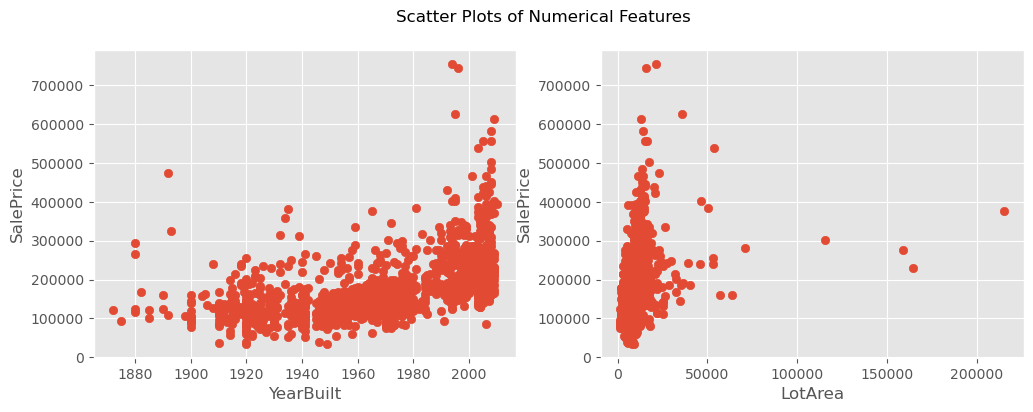

In [493]:
fig, axs = plt.subplots(nrows=1, ncols=len(training_data_Numerical.drop('SalePrice', axis=1).columns), figsize=(12, 4))

for i in range(len(training_data_Numerical.drop('SalePrice', axis=1).columns)):
    fig.suptitle('Scatter Plots of Numerical Features')
    axs[i].scatter(training_data_Numerical.iloc[:, i], training_data_Numerical['SalePrice'])
    axs[i].set_xlabel(training_data_Numerical.columns[i])
    axs[i].set_ylabel('SalePrice')

plt.show()

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>From the scatter plots we can see that YearBuilt has a more exponential shape which is understandable as the more modern the house the less renovation it needs and the more modern the utilities it has are so it is to be expected that the SalesPrice would increase. For lotArea, there are more outliers so its hard to discern a shape but it is clear that there is no relationship as the prices around 0 to 5000 are increasing and decreasing with no pattern.so need to remove the outliers to get a better idea of the spread</p>
    <br>
    <p>From the scatter plots the existence of outliers are visible so we do need to handle them appropriately</p>
</div>

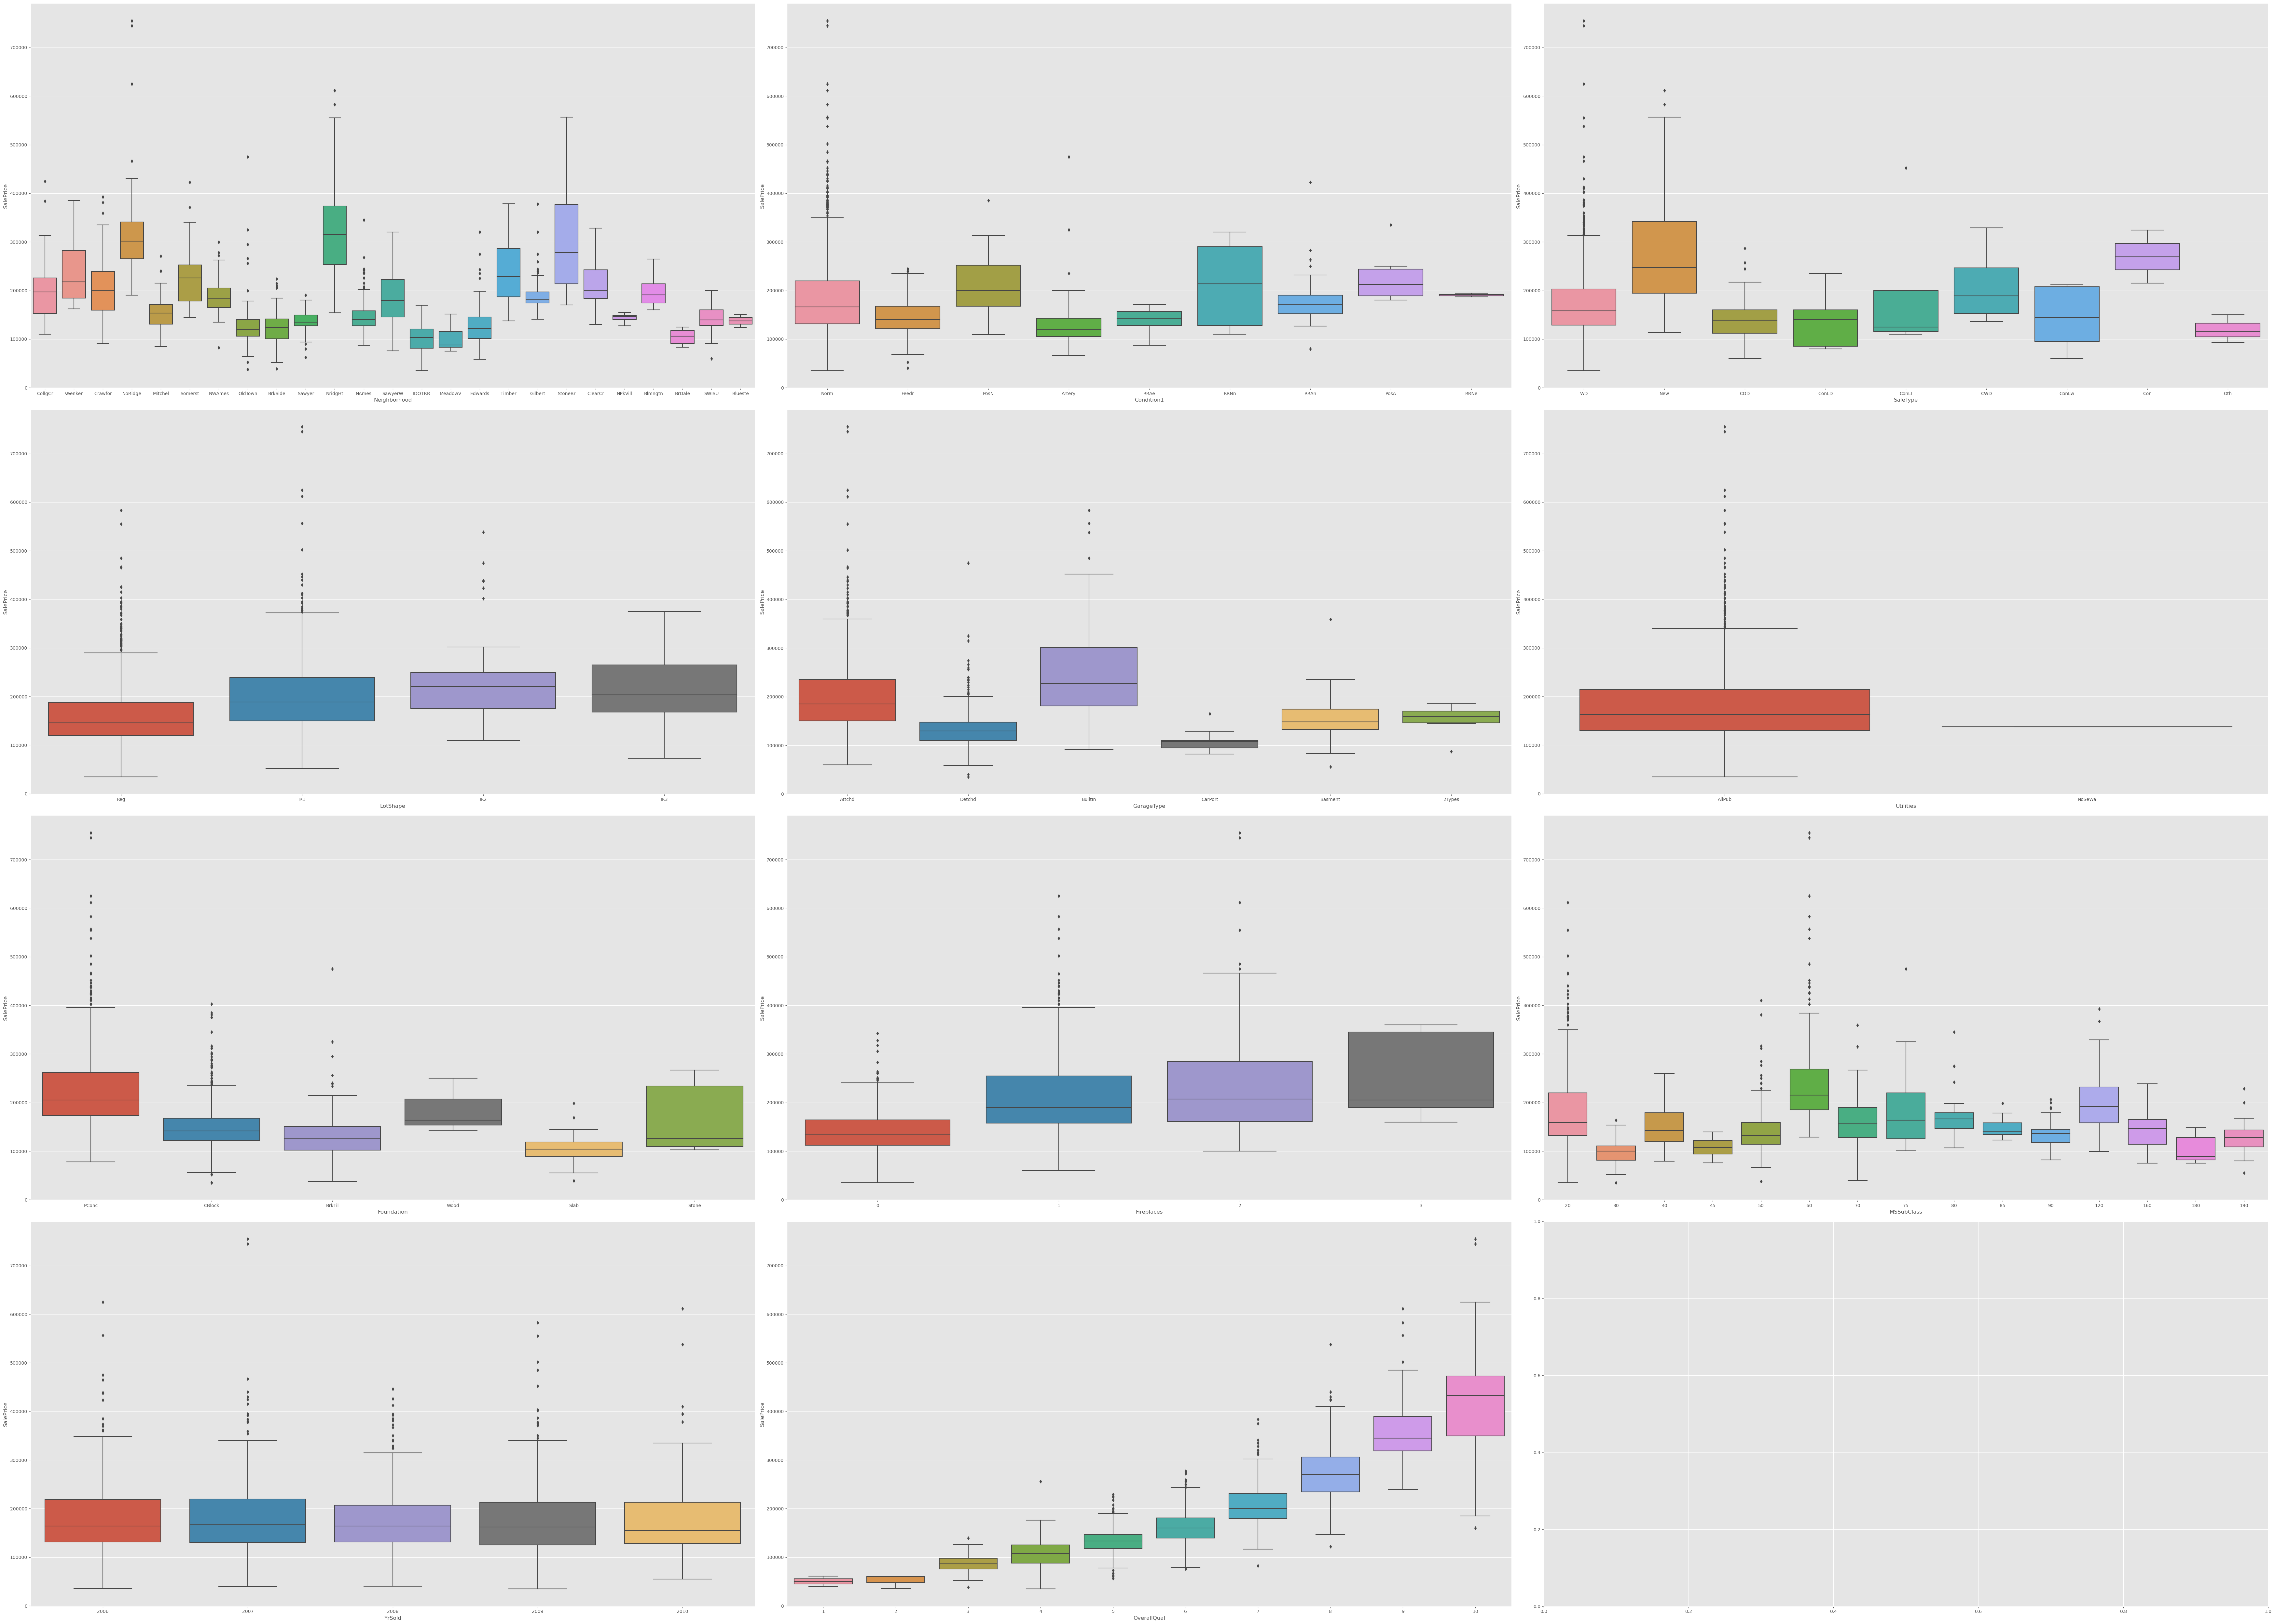

In [494]:
fig, axes = plt.subplots(nrows=4, ncols=math.ceil(len(training_data_cat.columns)/4), figsize=(70, 50))
axes = axes.flatten()

for i in range(len(training_data_cat.columns)):
        sns.boxplot(x=training_data_cat.iloc[:, i],y=training_data_copy["SalePrice"],ax=axes[i])

plt.tight_layout()
plt.show()

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>From the box plots we can see the existence of a lot of outliers mainly from sales Price which makes sense the price of a house can fluctuate a lot and when only looking at one feature at a time which is a bit unrealistic</p>
</div>

<div class="alert alert-info">Bar charts the bar itself represents the mean/median of house prices for each category. </div> 

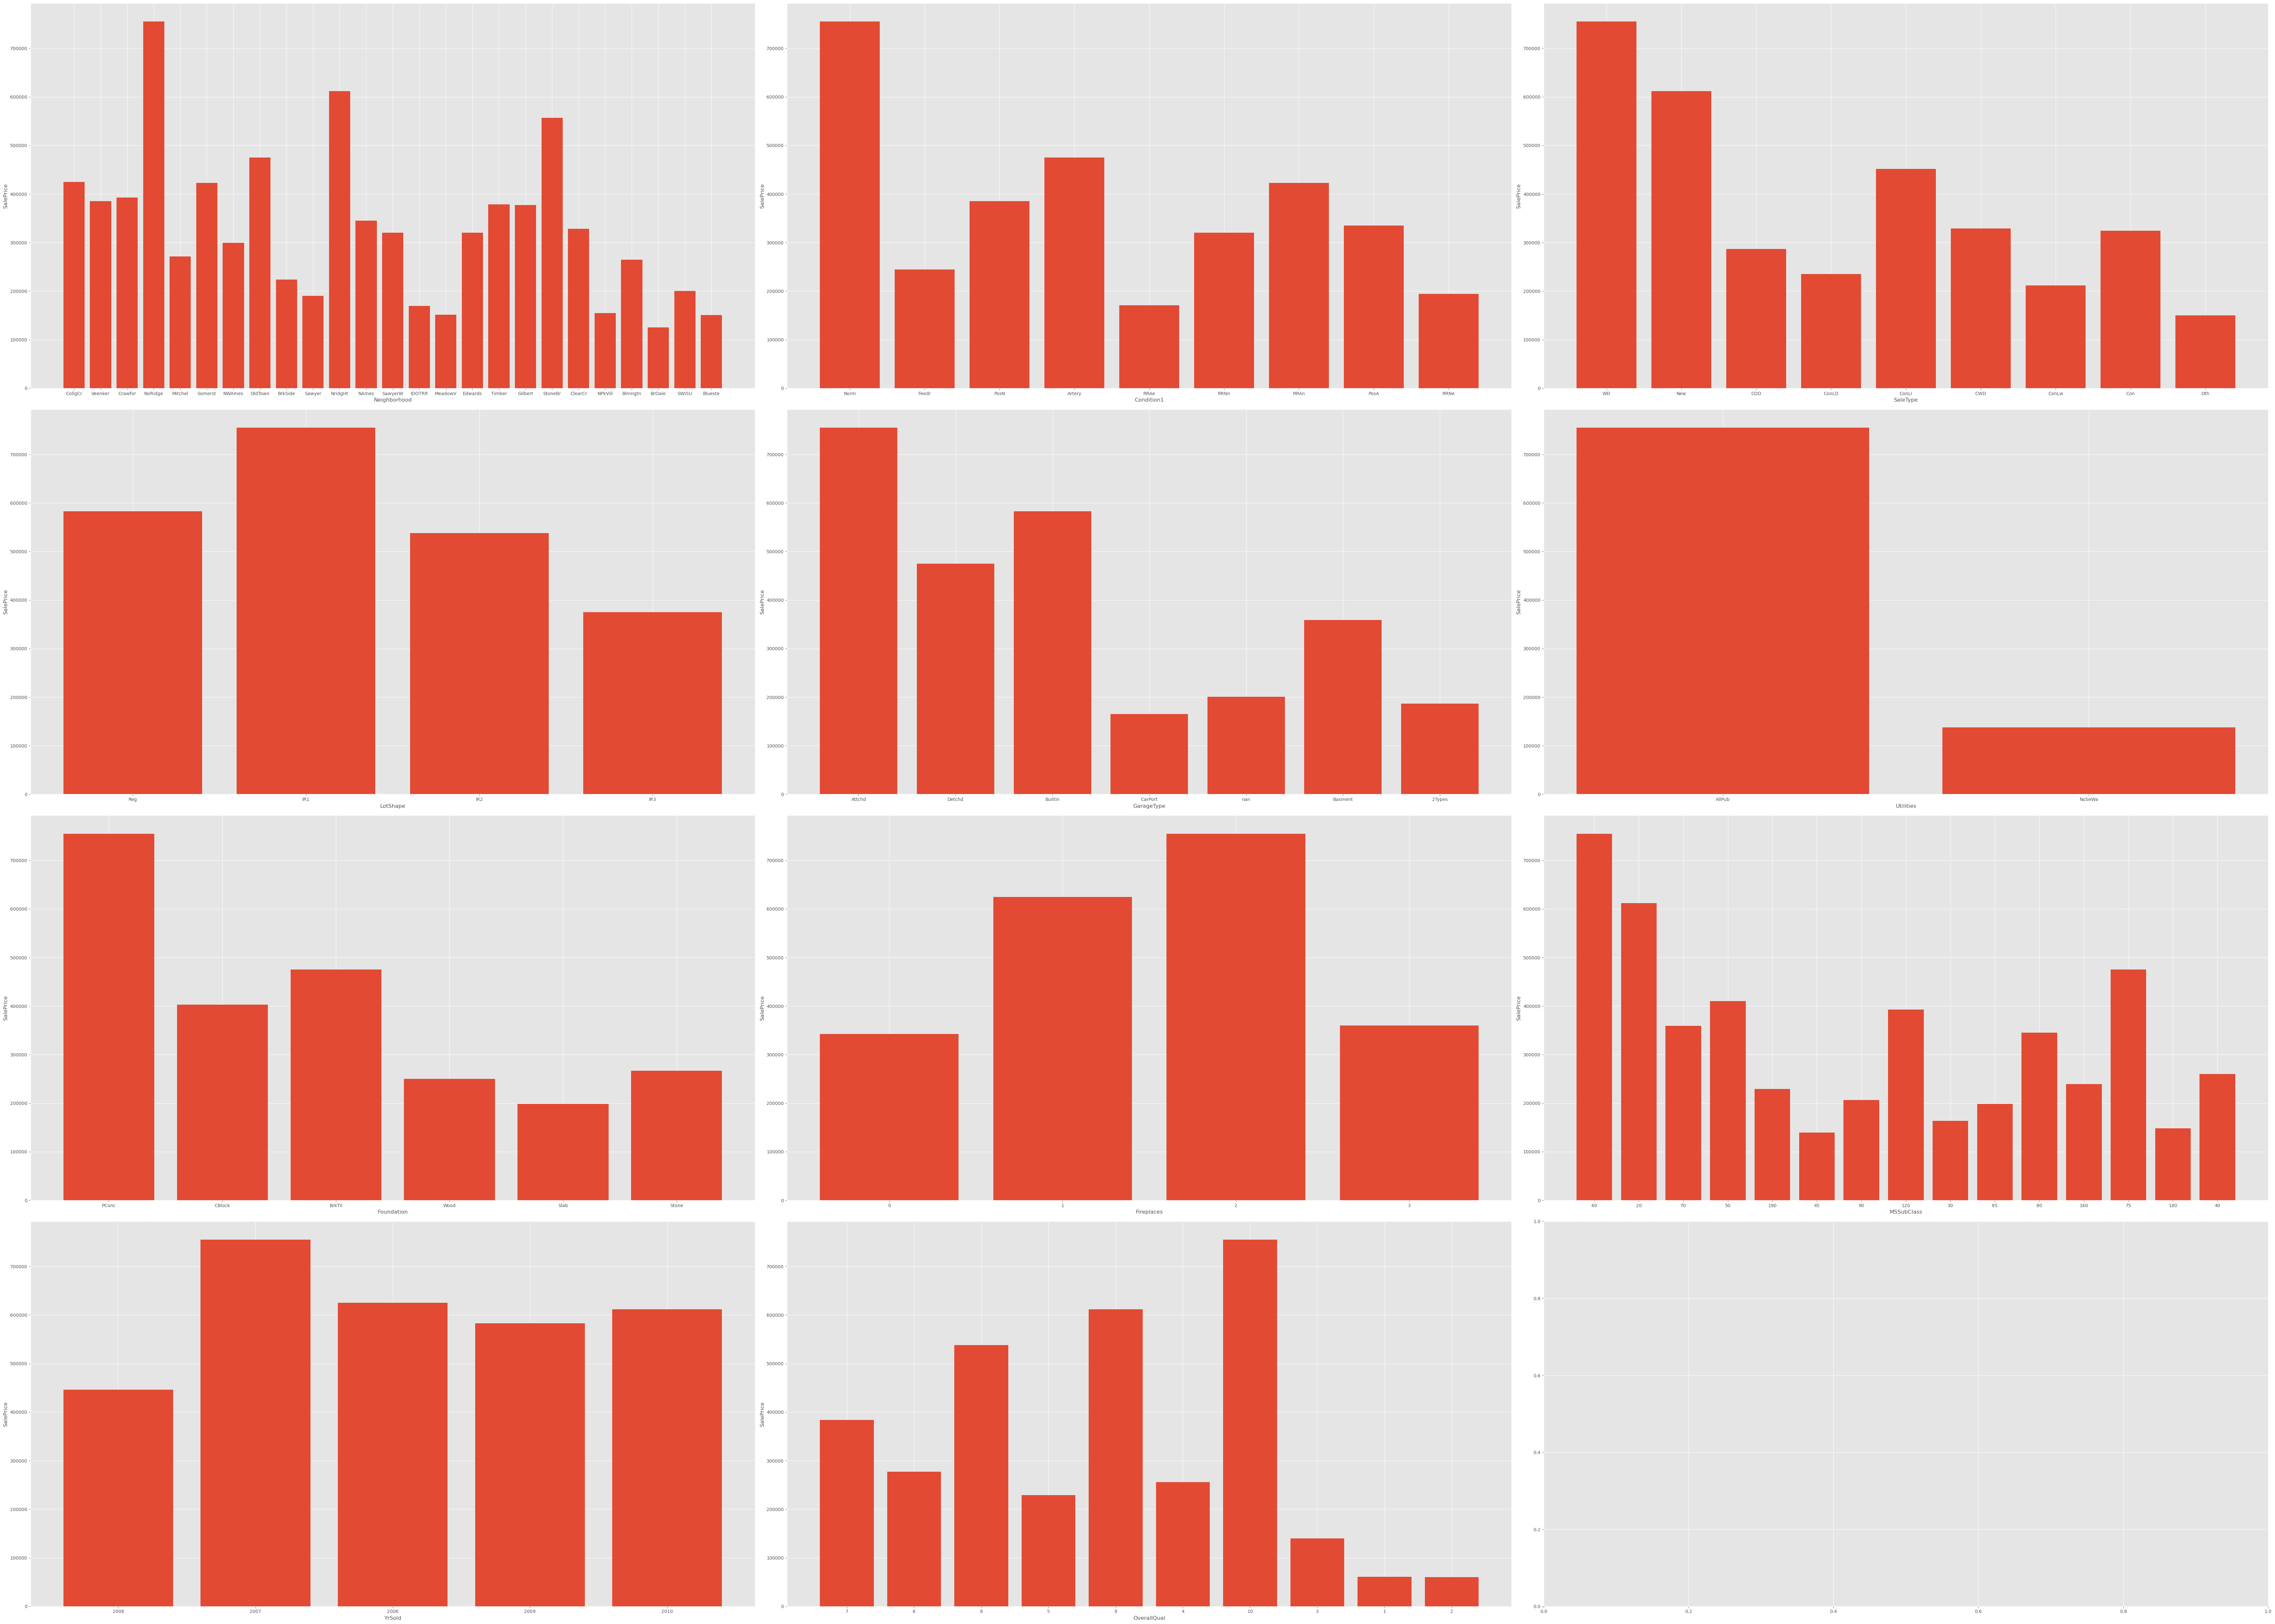

In [495]:
fig, axes = plt.subplots(nrows=4, ncols=math.ceil(len(training_data_cat.columns)/4), figsize=(70, 50))
axes = axes.flatten()

for i in range(len(training_data_cat.columns)):
        axes[i].bar(training_data_cat.iloc[:, i].astype(str), training_data_copy['SalePrice'])
        axes[i].set_xlabel(training_data_cat.columns[i])
        axes[i].set_ylabel("SalePrice")

plt.tight_layout()
plt.show()

<div style="background-color: #FDF4F5; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <p style="text-align: center">Removing Outliers from Numerical Features</p>
    <p style="text-align: center; font-size: 10px">We decided to use the interquartile method to detect outliers and because there weren't many we decided to remove them</p>
</div>

In [496]:
def handle_outlier(dataset,col):
    lower_q = dataset[col].quantile(0.25)
    upper_q = dataset[col].quantile(0.75)
    IQR = upper_q - lower_q
    lower_limit = lower_q - 1.5 * IQR
    upper_limit = upper_q + 1.5 * IQR

    outlier_mask = (dataset[col] < lower_limit) | (dataset[col] > upper_limit)
    dataset = dataset[~outlier_mask]

    return dataset

In [497]:
for col in training_data_Numerical:
    training_data_copy = handle_outlier(training_data_copy,col)

training_data_copy

,Id,Fireplaces,MSSubClass,YearBuilt,Neighborhood,Condition1,SaleType,LotArea,LotShape,GarageType,Utilities,Foundation,YrSold,OverallQual,SalePrice
0,1,0,60,2003,CollgCr,Norm,WD,8450,Reg,Attchd,AllPub,PConc,2008,7,208500
1,2,1,20,1976,Veenker,Feedr,WD,9600,Reg,Attchd,AllPub,CBlock,2007,6,181500
2,3,1,60,2001,CollgCr,Norm,WD,11250,IR1,Attchd,AllPub,PConc,2008,7,223500
3,4,1,70,1915,Crawfor,Norm,WD,9550,IR1,Detchd,AllPub,BrkTil,2006,7,140000
4,5,1,60,2000,NoRidge,Norm,WD,14260,IR1,Attchd,AllPub,PConc,2008,8,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1,60,1999,Gilbert,Norm,WD,7917,Reg,Attchd,AllPub,PConc,2007,6,175000
1456,1457,2,20,1978,NWAmes,Norm,WD,13175,Reg,Attchd,AllPub,CBlock,2010,6,210000
1457,1458,2,70,1941,Crawfor,Norm,WD,9042,Reg,Attchd,AllPub,Stone,2010,7,266500
1458,1459,0,20,1950,NAmes,Norm,WD,9717,Reg,Attchd,AllPub,CBlock,2010,5,142125


<div style="background-color: #FDF4F5; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <p style="text-align: center">To see how removing the outlier changed the distribution</p>
    <p style="text-align: center; font-size: 10px">Remove Later</p>
</div>

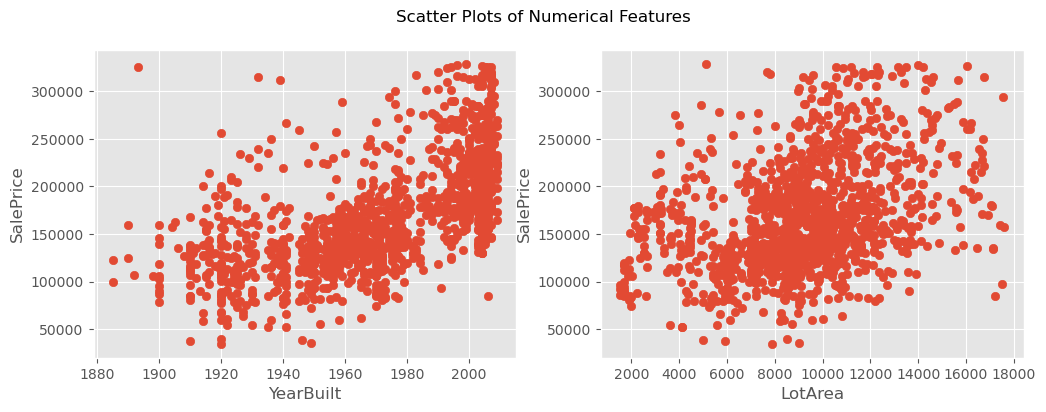

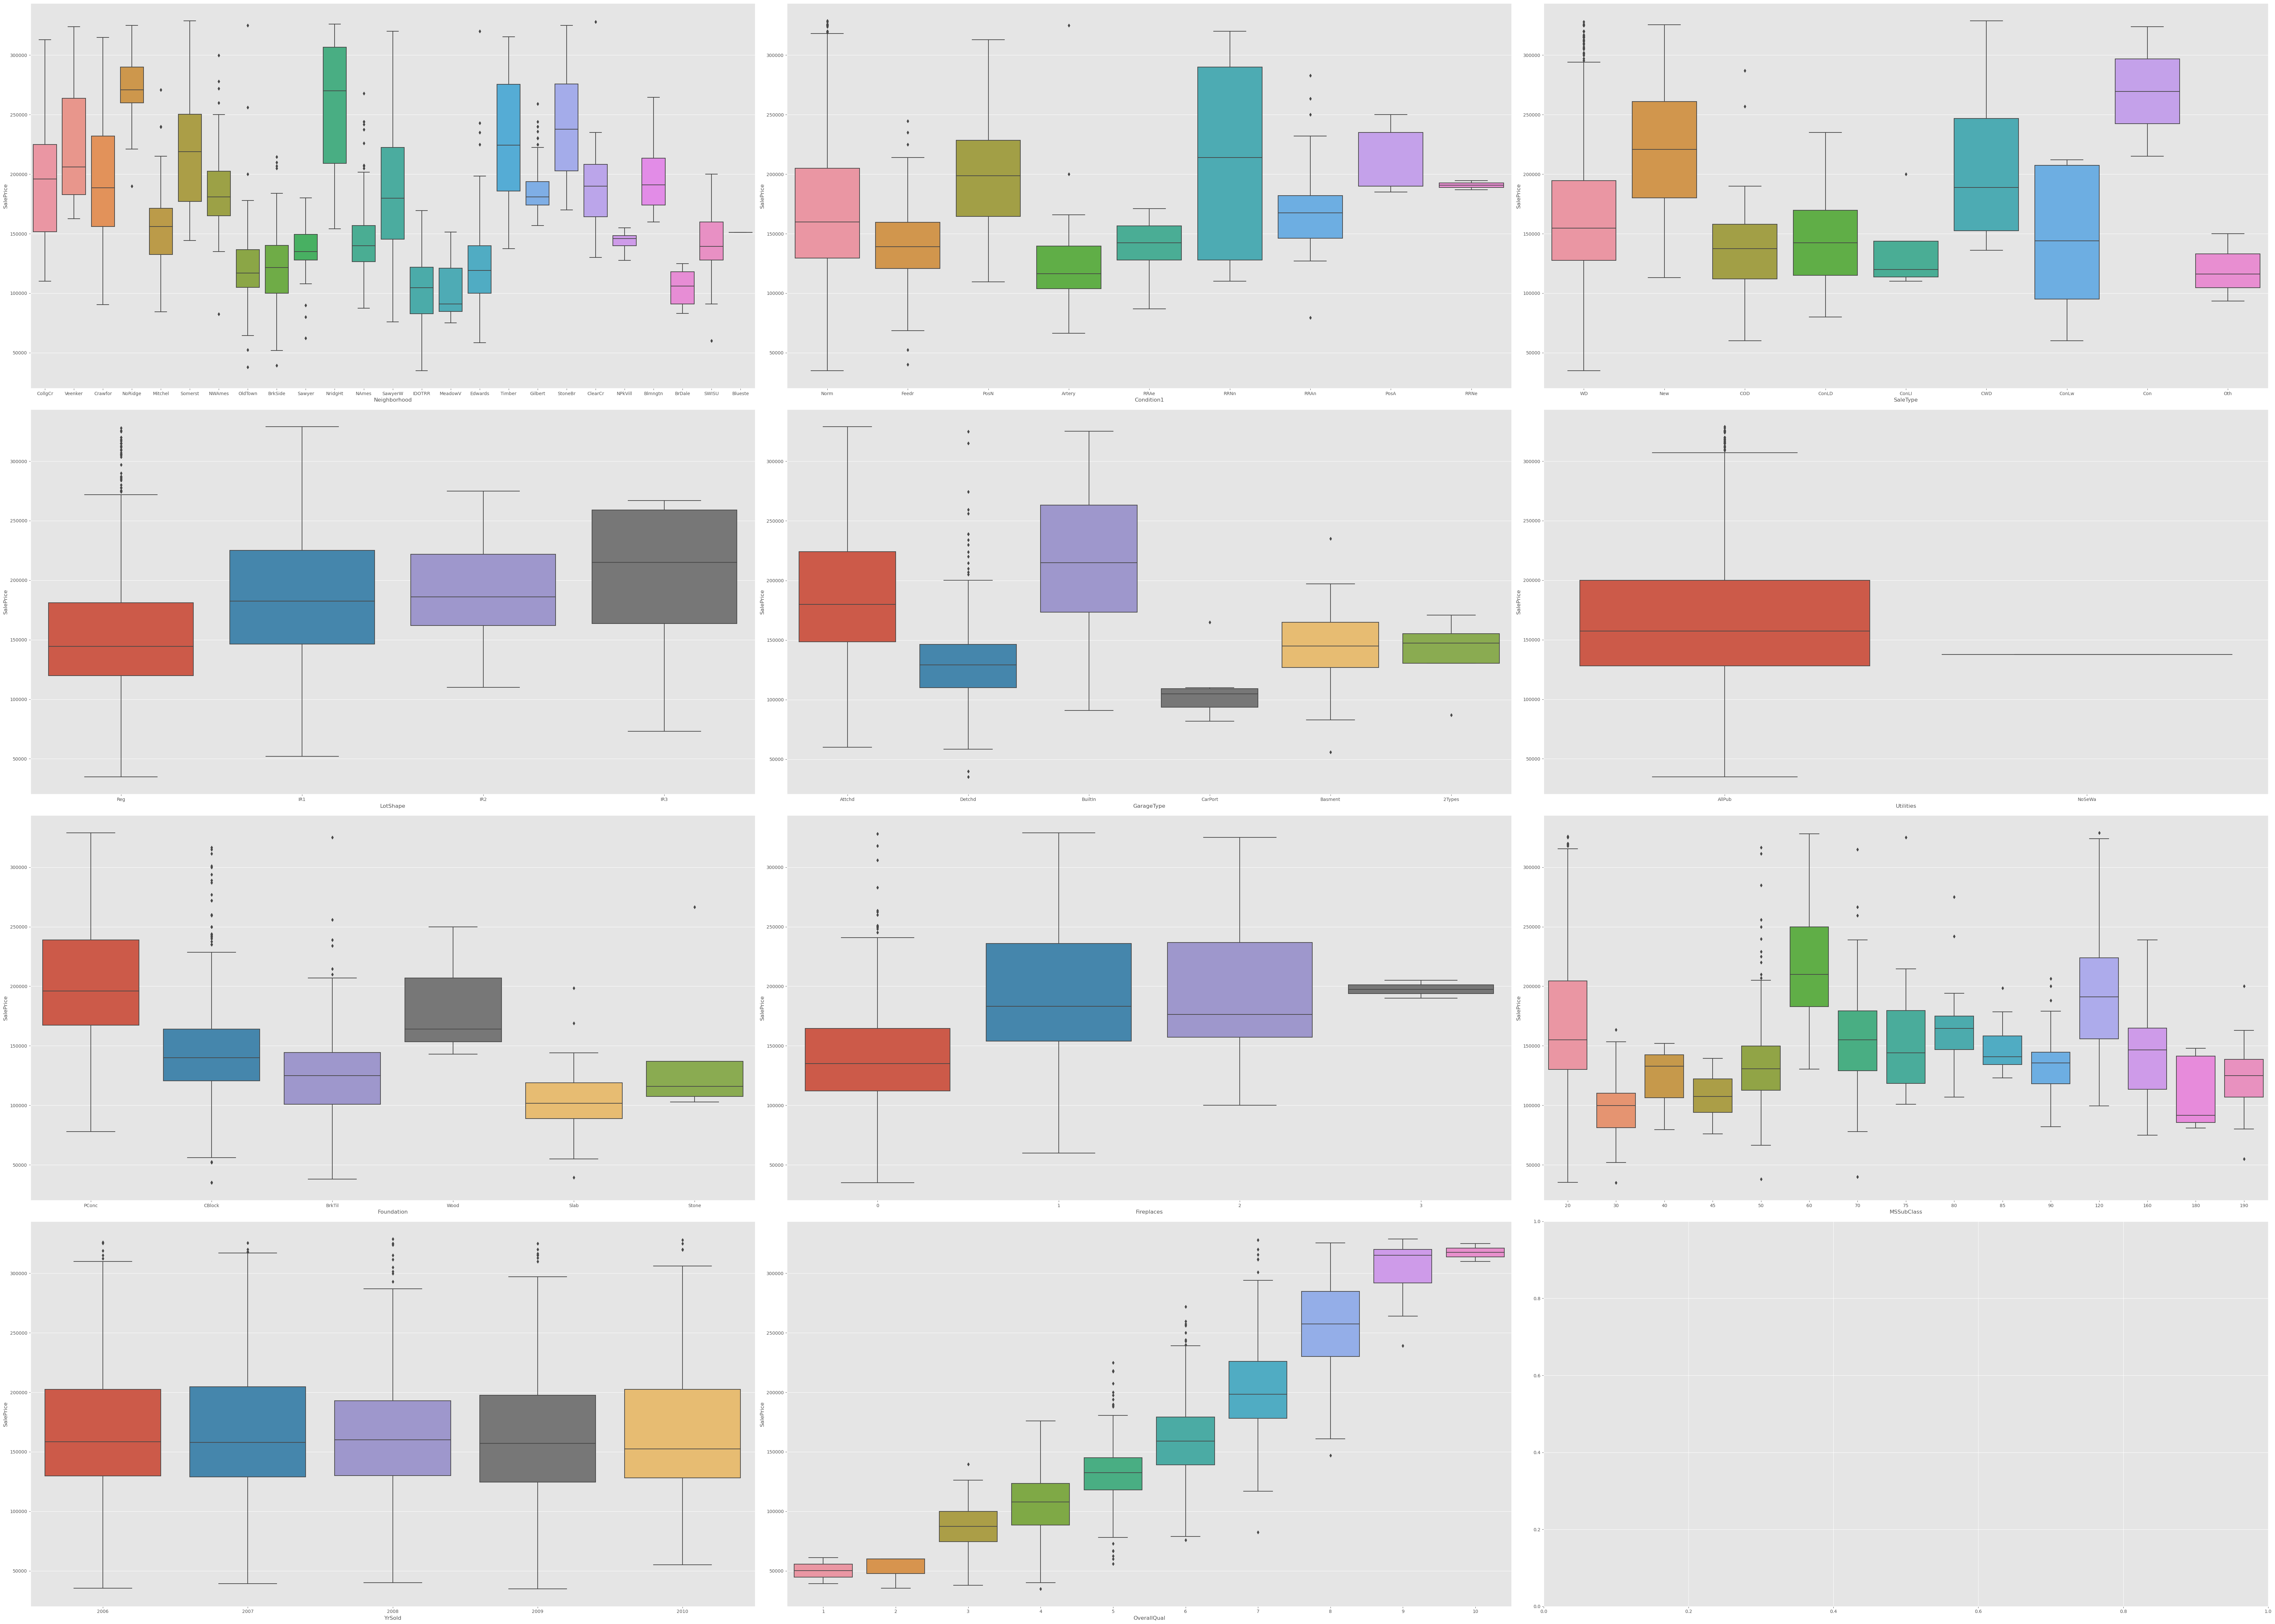

In [498]:
fig, axs = plt.subplots(nrows=1, ncols=len(training_data_Numerical.drop('SalePrice', axis=1).columns), figsize=(12, 4))

for i in range(len(training_data_Numerical.drop('SalePrice', axis=1).columns)):
    fig.suptitle('Scatter Plots of Numerical Features')
    axs[i].scatter(training_data_copy[training_data_Numerical.columns[i]], training_data_copy['SalePrice'])
    axs[i].set_xlabel(training_data_Numerical.columns[i])
    axs[i].set_ylabel('SalePrice')

plt.show()

fig, axes = plt.subplots(nrows=4, ncols=math.ceil(len(training_data_cat.columns)/4), figsize=(70, 50))
axes = axes.flatten()

for i in range(len(training_data_cat.columns)):
        sns.boxplot(x=training_data_cat.iloc[:, i],y=training_data_copy["SalePrice"],ax=axes[i])

plt.tight_layout()
plt.show()

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>The scatter plot for LotArea now has a much clearer shape but still hard to discren a pattern. On the other hand Year built only removed some outliers on the edge making the exponential line clearer</p>
    <br>
    <p>The box plots we see a massive change, number of outliers have decreased drastically and better IQR is available</p>
</div>

In [499]:
training_data_copy

,Id,Fireplaces,MSSubClass,YearBuilt,Neighborhood,Condition1,SaleType,LotArea,LotShape,GarageType,Utilities,Foundation,YrSold,OverallQual,SalePrice
0,1,0,60,2003,CollgCr,Norm,WD,8450,Reg,Attchd,AllPub,PConc,2008,7,208500
1,2,1,20,1976,Veenker,Feedr,WD,9600,Reg,Attchd,AllPub,CBlock,2007,6,181500
2,3,1,60,2001,CollgCr,Norm,WD,11250,IR1,Attchd,AllPub,PConc,2008,7,223500
3,4,1,70,1915,Crawfor,Norm,WD,9550,IR1,Detchd,AllPub,BrkTil,2006,7,140000
4,5,1,60,2000,NoRidge,Norm,WD,14260,IR1,Attchd,AllPub,PConc,2008,8,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1,60,1999,Gilbert,Norm,WD,7917,Reg,Attchd,AllPub,PConc,2007,6,175000
1456,1457,2,20,1978,NWAmes,Norm,WD,13175,Reg,Attchd,AllPub,CBlock,2010,6,210000
1457,1458,2,70,1941,Crawfor,Norm,WD,9042,Reg,Attchd,AllPub,Stone,2010,7,266500
1458,1459,0,20,1950,NAmes,Norm,WD,9717,Reg,Attchd,AllPub,CBlock,2010,5,142125


<div style="background-color: #FDF4F5; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <p style="text-align: center">Checking which categorical features to remove</p>
    <p style="text-align: center; font-size: 10px">We decided to check if any has categories that are useless and to map some of em to see correlation</p>
</div>

In [500]:
for col in training_data_cat.columns:
    counts = training_data_cat[col].value_counts()
    print(counts)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
PConc     647
CBl

In [501]:
# Numeric column
num_col = 'SalePrice'
cat_cols= training_data_copy.select_dtypes("object")

print("Chi squared of the values with a lot of missing values: ")

# Iterate over the categorical columns
for col in cat_cols.columns:
    # Create a crosstab table of the numeric column and the categorical column
    crosstab = pd.crosstab(training_data_Numerical[num_col], cat_cols[col])
    # Perform a chi-squared test to calculate the association between the two columns
    chi2_stat, p_val, dof, expected = chi2_contingency(crosstab)
    # Print the results
    print(f'Correlation between {num_col} and {col}:')
    print(f'Chi-squared statistic: {chi2_stat:.2f}')
    print(f'P-value: {p_val:.2f}')
#     print(f'Degrees of freedom: {dof}')
    print('---------------------')

Chi squared of the values with a lot of missing values: 
Correlation between SalePrice and Neighborhood:
Chi-squared statistic: 14874.98
P-value: 0.00
---------------------
Correlation between SalePrice and Condition1:
Chi-squared statistic: 3758.99
P-value: 1.00
---------------------
Correlation between SalePrice and SaleType:
Chi-squared statistic: 5268.41
P-value: 0.00
---------------------
Correlation between SalePrice and LotShape:
Chi-squared statistic: 2152.60
P-value: 0.00
---------------------
Correlation between SalePrice and GarageType:
Chi-squared statistic: 2731.56
P-value: 0.85
---------------------
Correlation between SalePrice and Utilities:
Chi-squared statistic: 219.67
P-value: 1.00
---------------------
Correlation between SalePrice and Foundation:
Chi-squared statistic: 3284.12
P-value: 0.00
---------------------


<div style="background-color: #FDF4F5; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <p style="text-align: center">Choose the top 5 features to work with</p>
    <p style="text-align: center; font-size: 10px">Putting those in a copy to use</p>
</div>

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>We chose based on correlation,covariance, visualisation and domain knowledge</p>
<div>

In [502]:
training_data_copy = training_data_copy[['Id', 'Fireplaces', 'YearBuilt', 'LotArea','Foundation','OverallQual','SalePrice']]
len(training_data_copy)

1323

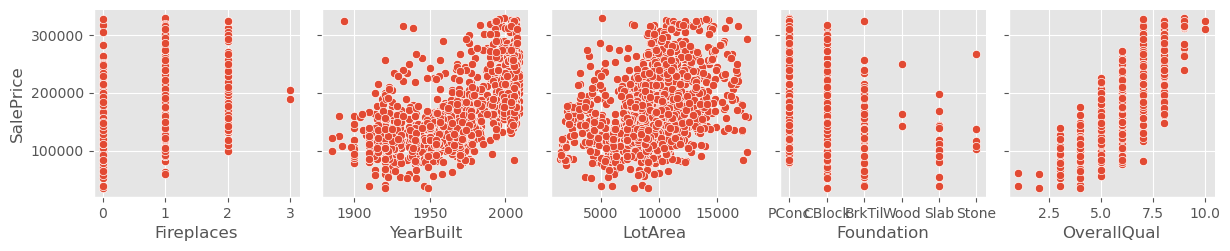

In [503]:
# Create a scatter plot matrix
sns.pairplot(training_data_copy, y_vars=['SalePrice'], x_vars=['Fireplaces', 'YearBuilt', 'LotArea', 'Foundation', 'OverallQual'])

In [504]:
training_data_copy

,Id,Fireplaces,YearBuilt,LotArea,Foundation,OverallQual,SalePrice
0,1,0,2003,8450,PConc,7,208500
1,2,1,1976,9600,CBlock,6,181500
2,3,1,2001,11250,PConc,7,223500
3,4,1,1915,9550,BrkTil,7,140000
4,5,1,2000,14260,PConc,8,250000
...,...,...,...,...,...,...,...
1455,1456,1,1999,7917,PConc,6,175000
1456,1457,2,1978,13175,CBlock,6,210000
1457,1458,2,1941,9042,Stone,7,266500
1458,1459,0,1950,9717,CBlock,5,142125


In [521]:
nc = pd.DataFrame(training_data_copy)
missing = nc.isnull().sum()
print(missing)

Id             0
Fireplaces     0
YearBuilt      0
LotArea        0
Foundation     0
OverallQual    0
SalePrice      0
dtype: int64


<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>Thankfully the previous steps all removed missing values so no need to do anything</p>
</div>

In [523]:
duplicate_rows = training_data_copy[training_data_copy.duplicated()]
duplicate_rows

,Id,Fireplaces,YearBuilt,LotArea,Foundation,OverallQual,SalePrice


<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>Thankfully no duplicated records to remove</p>
</div>

<div style="background-color: #C0DBEA; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <h3 style="text-align: center">Part 2: Testing Different Models</h3>
</div>

<div style="background-color: #9384D1; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem">
    <h3 style="text-align: center">Regression Models</h3>
    <h4>Preformance Metrics: </h4>
    <h5>R Sqaured: measures the goodness of fit of the model (variance) = ranges from 0 to 1 = closer to 1 the better</h5>
    <h5>MSE: average squared difference between the predicted values and the actual values in the dataset = lower values indicate better accurary</h5>
</div>

In [505]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [506]:
train = training_data_copy.copy()

train['Foundation'], x = pd.factorize(train['Foundation'])

In [507]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,1:-1], train.iloc[:,-1], test_size=0.2, random_state=0)

In [508]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [509]:
# linear regression with degree 1
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print('Training score: ',lin_reg.score(X_train, y_train))
print("Mean squared error: ", mse) #MSE -> 0
print("R-squared value: ", r2) #R2 -> 1

Training score:  0.7594602409594388
Mean squared error:  861415179.7658998
R-squared value:  0.7432302986340718


<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>For our linear regression model with degree of 1 we got a good R squared value (close to 1) but a very high MSE. This indicates overfitting and that it is probably affected by noise</p>
<div>

In [510]:
# regression with degree 2
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

y_pred = lin_reg.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print('Training score: ',lin_reg.score(X_train_poly, y_train))
print("Mean squared error: ", mse) #MSE -> 0
print("R-squared value: ", r2) #R2 -> 1

Training score:  0.7919166058428881
Mean squared error:  823426848.5421788
R-squared value:  0.7545538191533592


<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>For our linear regression model with degree of 2 we got a similar R squared value but a better Mean Squared but still too high so we are still overfitting</p>
<div>

In [511]:
#Ridge Regression
ridge = Ridge(alpha=0.3, fit_intercept=True)
ridge.fit(X_train_poly, y_train)

y_pred = ridge.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Training Score: ', ridge.score(X_train_poly, y_train))
print("Mean squared error: ", mse) #MSE -> 0
print("R-squared value: ", r2) #R2 -> 1

Training Score:  0.7919165653143376
Mean squared error:  823301802.2154346
R-squared value:  0.7545910928266462


<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>For our ridge regression model there is a similar R squared value and a similar Mean Squared but still too high so we are still overfitting</p>
<div>

<div style="background-color: #9384D1; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem; text-align: center">
    <h3>Decision Trees - OverallQual</h3>
</div>

In [512]:
import sys
from packaging import version
import sklearn
import matplotlib.pyplot as plt
print("Sklearn package",sys.version_info)
print("Sklearn package",sklearn.__version__)

assert sys.version_info >= (3, 7)
# assert version.parse(sklearn.__version__) >= version.parse("1.2.1")
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Sklearn package sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
Sklearn package 1.2.2


In [513]:
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [514]:
X = training_data_copy.copy()
X = X.drop("Id",axis=1)
X = X.drop("OverallQual", axis=1)
y = training_data_copy['OverallQual']

X['Foundation'], x = pd.factorize(X['Foundation'])
X = X.values

In [515]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print("Training Data", X_train.shape)
print("Testing Data", X_test.shape)

Training Data (793, 5)
Testing Data (530, 5)


In [516]:
from sklearn.model_selection import cross_val_score

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
# Accuracy on the training dataset using the score method
print("Training Accuracy:", tree_clf.score(X_train, y_train))

y_pred = tree_clf.predict(X_test)
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

scores = cross_val_score(tree_clf, X, y, cv=50)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Training Accuracy: 1.0
Testing Accuracy: 0.4811320754716981


C:\Users\Bookw\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=50.
  warnings.warn(


0.47 accuracy with a standard deviation of 0.11


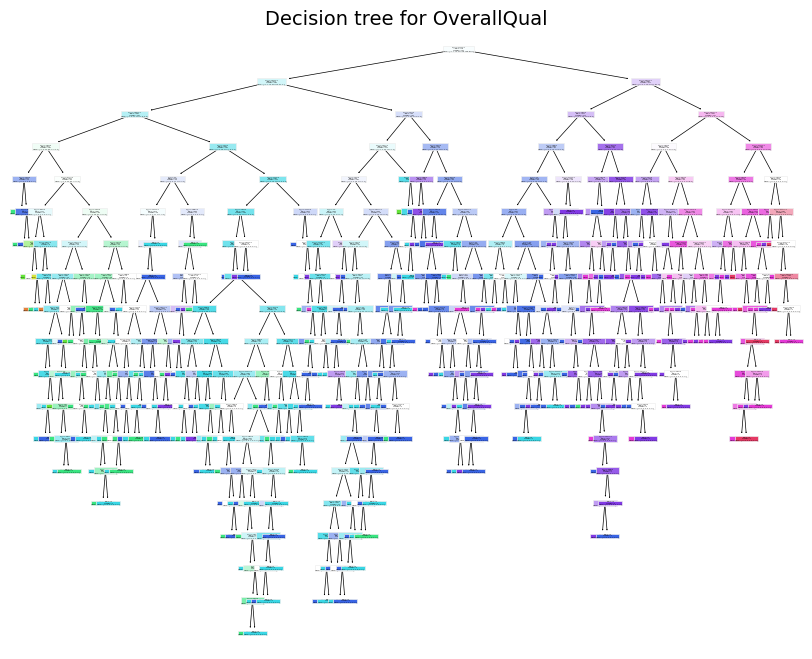

In [517]:
plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True)
plt.title("Decision tree for OverallQual")
plt.show()

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>For the features we chose, the training accuracy was perfect but the testing accuracy was low indicating overfitting</p>
    <p>low cross validation indicates that the model isn't that great and we porbably have an instance of undersampling due to the warning that rises</p>
    <p>We will restrict the depth in attempt to fix the testing accuracy</p>
<div>

In [518]:
tree_clf = DecisionTreeClassifier(max_depth=5,random_state=42)
tree_clf.fit(X_train, y_train)
# Accuracy on the training dataset using the score method
print("Training Accuracy:", tree_clf.score(X_train, y_train))

y_pred = tree_clf.predict(X_test)
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

scores = cross_val_score(tree_clf, X, y, cv=50)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Training Accuracy: 0.648171500630517
Testing Accuracy: 0.5075471698113208


C:\Users\Bookw\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=50.
  warnings.warn(


0.56 accuracy with a standard deviation of 0.08


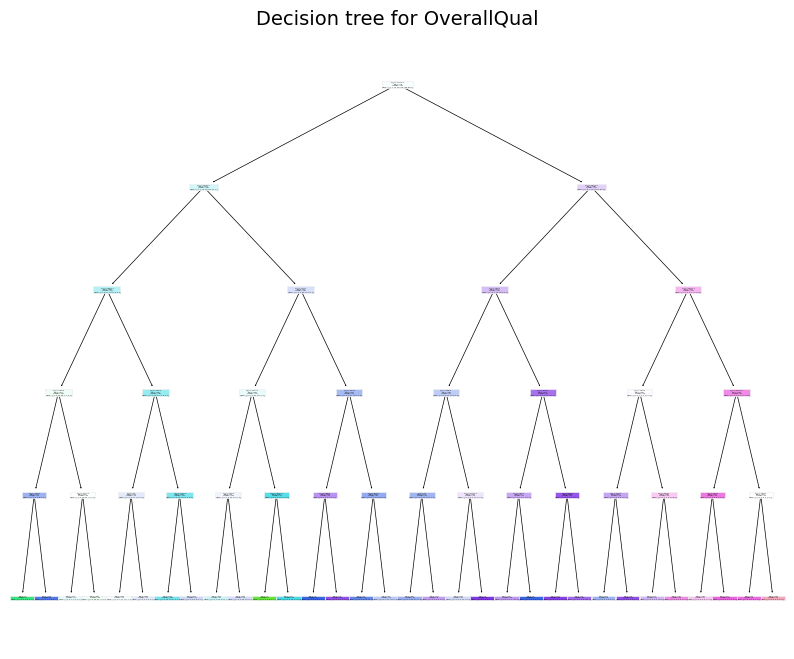

In [519]:
plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True)
plt.title("Decision tree for OverallQual")
plt.show()

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>With a lower depth we have a better testing accuracy and better cross validation so less overfitting but not perfect</p>
<div>

<div style="background-color: #9384D1; color: black; border: 2px double black; border-radius: 2rem;padding: 1rem; text-align: center">
    <h3>KNN- OverallQual</h3>
</div>

In [520]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train = training_data_copy.copy()
train['Foundation'], x = pd.factorize(train['Foundation'])

X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,[1,2,3,4,6]], train.iloc[:,5], test_size=0.3, random_state=0)

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.49622166246851385


<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>Models show a case of overfitting which indicates the wrong choice of features</p>
<div>

<div style="background-color: #ECC9EE; color: black; border: 2px double black; border-radius: 2rem; padding: 2rem">
    <p>In conclusion: It is intresting that the features caused overfit because they had good number of correlations that maybe it is better to choose more based on domain knowledge than correlation values</p>
</div>